In [21]:
import numpy as np
import pandas as pd
import os


In [24]:
os.chdir("E:\\kaggle datas\\diabetes_ML")

In [25]:
data = pd.read_csv("diabetes.csv")

In [26]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
dtype_df = data.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,7
1,float64,2


In [29]:
data.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

Text(0.5, 1.0, 'diabetes Distributions \n (0: No diabetes || 1: diabetes)')

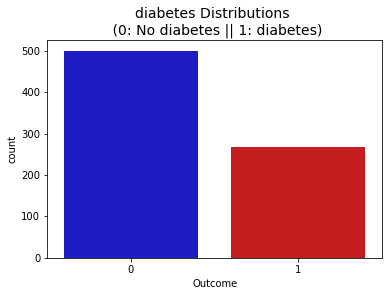

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#0101DF", "#DF0101"]

sns.countplot('Outcome', data=data, palette=colors)
plt.title('diabetes Distributions \n (0: No diabetes || 1: diabetes)', fontsize=14)

In [31]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
features = "+".join(data.columns.difference(["Outcome"]))

In [33]:
features

'Age+BMI+BloodPressure+DiabetesPedigreeFunction+Glucose+Insulin+Pregnancies+SkinThickness'

In [34]:
#perform vif

a, b = dmatrices(formula_like= 'Outcome ~ ' + features,data=data,return_type="dataframe")
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["Features"] = b.columns

In [35]:
vif

,VIF Factor,Features
0,35.039974,Intercept
1,1.588368,Age
2,1.297450,BMI
3,1.181863,BloodPressure
4,1.067090,DiabetesPedigreeFunction
5,1.298961,Glucose
6,1.427536,Insulin
7,1.430872,Pregnancies
8,1.507432,SkinThickness


In [36]:
X = data.drop('Outcome', axis = 1)
y = data.Outcome

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)


In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\per\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred = logreg.predict(X_test)

In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [41]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
print(cm)

0.8072916666666666
[[119  11]
 [ 26  36]]


In [42]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
import pickle
# Saving model to disk
pickle.dump(logreg, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))


In [45]:
print(model.predict([[3, 100, 78, 25, 100, 48.9, 0.167, 80]]))

[0]
